In [3]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split # для манипулирования данными

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint
from imblearn.over_sampling import SMOTE
from collections import Counter

# url ="C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.data"  # hone pc
# url_2= "C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.names"  # hone pc


url ="C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.data"  # laptop
url_2= "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.names"  # laptop

In [4]:
def tsne_func(df:pd.DataFrame,  no_resh=None):
    scaler = MinMaxScaler()
# X= scaler.fit_transform(y_pred_SVM)

    embed = TSNE(
        n_components=1, # значение по умолчанию=2. Размерность вложенного пространства.
        perplexity=10, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
        early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
        learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
        n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
        n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
        min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
        metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
        init='random',# {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
        verbose=0, # значение по умолчанию=0. Уровень детализации.
        random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
        method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
        angle=0.5, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
        n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
            )

    # Преобразование X
    if no_resh:
        X_embedded = embed.fit_transform(df)
    else:
        X_embedded = embed.fit_transform(df.reshape(-1, 1))

    return X_embedded

def umap_function(df, method='MinMax', no_resh=None):

    # if method=='MinMax':
    #     scaler = MinMaxScaler()
    # elif method=='Standard':
    #     scaler = preprocessing.StandardScaler()
    # else:
    #     scaler = preprocessing.RobustScaler()
    
    # X= scaler.fit_transform(df.reshape(-1, 1))



    manifold = umap.UMAP()#.fit(X)
    
    if  no_resh:
        X_reduced = manifold.fit_transform(df)
    else:
        X_reduced = manifold.fit_transform(df.reshape(-1, 1))

    return X_reduced

In [5]:
col_names = [   "class","date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt", "germination", "plant-growth", 
                "leaves","leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers",
                "canker-lesion", "fruiting-bodies", "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed",
                "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots"
            ]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Read data from URL
bob = pd.read_csv(url, names=col_names)
color=list(bob)
bob=bob.replace("?",0)
bob=bob.dropna()

for i in list(bob):
    try:
        bob[i]=bob[i].str.strip() 
    except:
        print(i)

list_class=bob['class'].to_list()
dict_class={}
a=1
for i in list_class:
 
    if i not in dict_class.keys():
        dict_class[i]=a
        a+=1
# bob=bob.fillna(0)
bob=bob.dropna()
bob['class']=bob['class'].apply(lambda x: dict_class[x] )  
bob=bob.dropna()
bob= bob[ (bob['class']== 6) |(bob['class']== 11) |(bob['class']== 7) | (bob['class']==10 ) |(bob['class']== 9) |(bob['class']== 3) ] # (bob['class']==2 ) |

predictors, target =bob[color[1:]], bob['class'] #  делим на то что есть и на то что предсказать 

x_train , x_test , y_train, y_test = train_test_split(predictors['date'], target, random_state=100, test_size = 0.5) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=100)
x_test=x_test.values.reshape(-1, 1)

print(Counter(x_train)) # узнать сколько классов 

# y_train=y_train[y_train[]]

leaves
Counter({'4': 9, '1': 5, '5': 5, '3': 4, '6': 3, '0': 2, '2': 2})


In [6]:

predictors, target =bob[color[1:]], bob['class'] #  делим на то что есть и на то что предсказать 
x_train , x_test , y_train, y_test = train_test_split(predictors, target, random_state=0) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=100)

SMOTE (Synthetic Minority Over-sampling Technique) в Python — это алгоритм ресемплинга, который используется для борьбы с проблемой дисбаланса классов в задачах машинного обучения. Давайте рассмотрим, как работает SMOTE:

Выбор миноритарного класса:

Алгоритм начинает с выбора миноритарного класса, который представлен меньшим количеством примеров.
Выбор ближайших соседей:

Для каждого примера из миноритарного класса выбираются его k ближайших соседей в пространстве признаков. Количество соседей (k) определяется пользователем.
Генерация синтетических примеров:

Для каждого примера миноритарного класса генерируются синтетические примеры, добавляя к нему взвешенную разницу между ним и одним из его ближайших соседей. Это делается для каждого соседа.
Добавление синтетических примеров:

Синтетические примеры добавляются к исходному набору данных миноритарного класса.

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train) 

In [8]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE

# x_train=x_train.to_frame()
sm = SMOTE( k_neighbors = 2, random_state = 100) 
X_diver_res, y_diver_res = sm.fit_resample(x_train, y_train.ravel())  # из массива массивов делает одномерный массив (ravel)
sm = BorderlineSMOTE( k_neighbors = 2,random_state=100, kind='borderline-1')
X_res, y_res = sm.fit_resample(x_train, y_train.ravel())

sm = BorderlineSMOTE( k_neighbors = 2,random_state=100, kind='borderline-1')
X_res_2, y_res_2 = sm.fit_resample(x_train, y_train.ravel())


SMOTE (Synthetic Minority Over-sampling Technique), BorderlineSMOTE и Borderline-SMOTE2 являются различными вариантами алгоритмов ресемплинга, используемых для устранения проблемы дисбаланса классов в задачах машинного обучения. Давайте рассмотрим основные отличия между этими методами:

SMOTE (Synthetic Minority Over-sampling Technique):

SMOTE является базовым алгоритмом ресемплинга.
Он генерирует синтетические примеры миноритарного класса, добавляя к каждому примеру взвешенную разницу между ним и одним из его ближайших соседей.
BorderlineSMOTE:

BorderlineSMOTE представляет собой расширение SMOTE, которое уделяет внимание примерам, находящимся на "границе" между классами (borderline examples).
Примеры, которые находятся на границе, определяются как те, для которых большинство их ближайших соседей относится к другому классу.
BorderlineSMOTE генерирует синтетические примеры только для таких "граничных" примеров, что может сделать создание синтетических примеров более информативным.
Borderline-SMOTE2:

Borderline-SMOTE2 является еще одним улучшением SMOTE, которое также фокусируется на примерах, находящихся на границе между классами.
Отличие от BorderlineSMOTE заключается в выборе соседей: Borderline-SMOTE2 рассматривает только тех ближайших соседей, которые сами являются "граничными" примерами.
Это позволяет более эффективно фокусироваться на примерах, которые близки к решающей границе классов.
Выбор между этими вариантами зависит от конкретной задачи и характеристик данных. В некоторых случаях BorderlineSMOTE или Borderline-SMOTE2 могут быть более предпочтительными, чем обычный SMOTE, особенно если важно улучшить генерацию синтетических примеров на границе классов.

In [9]:
for x_new_train,y_new_train, version in zip([x_train, X_diver_res, X_res, X_res_2],[y_train, y_diver_res, y_res, y_res_2], ['ДЕФОЛТ','SMOTE','borderline-SMOTE ','borderline-SMOTE _2']): 
    try:
        # x_new_train=x_new_train.values.reshape(-1, 1)
        pass
    except:
        ...

    params={'kernel':['linear','rbf' ,  'poly', 'sigmoid'], 'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

    clf_1_SVC = svm.SVC(kernel='linear')
    clf_2_SVC = svm.SVC(kernel='rbf') 
    clf_3_SVC = svm.SVC(kernel='poly')
    print(y_new_train)
    clf_predict=clf_1_SVC.fit(x_new_train,y_new_train)
    clf_predict_2=clf_2_SVC.fit(x_new_train,y_new_train)
    clf_predict_3=clf_3_SVC.fit(x_new_train,y_new_train)
    clf_SVC = svm.SVC()
    y_pred_SVM= clf_predict.predict(x_test)
    y_pred_SVM_2= clf_predict_2.predict(x_test)
    y_pred_SVM_3= clf_predict_3.predict(x_test)





    knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
    knn_2 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
    knn_3 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    knn_model = knn.fit(x_new_train,y_new_train)
    knn_model_2 = knn_2.fit(x_new_train,y_new_train)
    knn_model_3 = knn_3.fit(x_new_train,y_new_train)
    y_pred_KNN = knn.predict(x_test)
    y_pred_KNN_2 = knn_2.predict(x_test)
    y_pred_KNN_3 = knn_3.predict(x_test)
    params={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    grid_search= GridSearchCV(estimator=knn, param_grid=params)
    grid_search.fit(x_new_train,y_new_train)






    random_forest = RandomForestClassifier(n_estimators=100 , criterion='gini')
    random_forest_2 = RandomForestClassifier(n_estimators=100, criterion='entropy' )
    random_forest_3 = RandomForestClassifier(n_estimators=100 , criterion='log_loss')
    random_forest.fit(x_new_train,y_new_train)
    random_forest_2.fit(x_new_train,y_new_train)
    random_forest_3.fit(x_new_train,y_new_train)
    y_pred_RF = random_forest.predict(x_test)
    y_pred_RF_2 = random_forest_2.predict(x_test)
    y_pred_RF_3 = random_forest_3.predict(x_test)



    params= {'criterion':['gini', 'entropy', 'log_loss'] }
    grid_search= GridSearchCV(estimator=random_forest, param_grid=params)
    grid_search.fit(x_new_train,y_new_train)



    metrics = []
    models =  ['SVM' , 'KNN', 'Random_Forest']
    predictions=[y_pred_SVM, y_pred_KNN, y_pred_RF]
    tprint(version)
    for lab,i in zip(models, predictions):
        precision, recall, fscore, _ = score(y_test, i, average='weighted')
        accuracy = accuracy_score(y_test, i)

        
        metrics.append(pd.Series({  'precision':precision,  # Точность 
                                    'recall':recall, # полнота  
                                    'fscore':fscore,
                                    'accuracy':accuracy,}, name=lab))

    metrics = pd.concat(metrics, axis=1)

    print(metrics)

0     10
1     10
2      3
3      6
4      9
5     11
6      7
7     10
8     11
9      6
10    11
11     7
12     6
13     3
14     9
15     6
16    11
17     7
18    11
19     3
20     6
21     7
22     9
23     6
24    10
25    10
26    11
27     9
28     3
29     6
30    10
31     7
32     3
33     7
34     9
35     7
36     6
37     3
38     9
39    11
40     3
41     3
42    11
43    10
44    10
45     7
46     9
47     9
Name: class, dtype: int64



           SVM       KNN  Random_Forest
precision  1.0  0.946667            1.0
recall     1.0  0.933333            1.0
fscore     1.0  0.925926            1.0
accuracy   1.0  0.933333            1.0
[10 10  3  6  9 11  7 10 11  6 11  7  6  3  9  6 11  7 11  3  6  7  9  6
 10 10 11  9  3  6 10  7  3  7  9  7  6  3  9 11  3  3 11 10 10  7  9  9]
 ____   __  __   ___   _____  _____ 
/ ___| |  \/  | / _ \ |_   _|| ____|
\___ \ | |\/| || | | |  | |  |  _|  
 ___) || |  | || |_| |  | |  | |___ 
|____/ |_|  |_| \___/   |_|  |_____|
                                    

           SVM       KNN  Random_Forest
precision  1.0  0.946667            1.0
recall     1.0  0.933333            1.0
fscore     1.0  0.925926            1.0
accuracy   1.0  0.933333            1.0
[10 10  3  6  9 11  7 10 11  6 11  7  6  3  9  6 11  7 11  3  6  7  9  6
 10 10 11  9  3  6 10  7  3  7  9  7  6  3  9 11  3  3 11 10 10  7  9  9]
 _                       _              _  _                      ____   __  __   

## F-мера является хорошим кандидатом на формальную метрику оценки качества классификатора. Она сводит к одному числу две других основополагающих метрики: точность и полноту. Имея в своем распоряжении подобный механизм оценки вам будет гораздо проще принять решение о том являются ли изменения в алгоритме в лучшую сторону или нет.

In [10]:

# plt.scatter(X_diver_res.reshape(1, -1)[0,:] ,y_diver_res , c=[i for i in y_diver_res], s=50, cmap='autumn')
# plt.scatter(X_diver_res ,y_diver_res , c=[i for i in y_diver_res], s=50, cmap='autumn')
# X_diver_res
y_diver_res

array([10, 10,  3,  6,  9, 11,  7, 10, 11,  6, 11,  7,  6,  3,  9,  6, 11,
        7, 11,  3,  6,  7,  9,  6, 10, 10, 11,  9,  3,  6, 10,  7,  3,  7,
        9,  7,  6,  3,  9, 11,  3,  3, 11, 10, 10,  7,  9,  9],
      dtype=int64)

In [11]:
# X_diver_res.reshape(1, -1)[0,:]

In [12]:
y_diver_res

array([10, 10,  3,  6,  9, 11,  7, 10, 11,  6, 11,  7,  6,  3,  9,  6, 11,
        7, 11,  3,  6,  7,  9,  6, 10, 10, 11,  9,  3,  6, 10,  7,  3,  7,
        9,  7,  6,  3,  9, 11,  3,  3, 11, 10, 10,  7,  9,  9],
      dtype=int64)

In [13]:
params={'kernel':['linear','rbf' ,  'poly', 'sigmoid'], 'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}


clf_1_SVC = svm.SVC(kernel='linear')
clf_2_SVC = svm.SVC(kernel='rbf') 
clf_3_SVC = svm.SVC(kernel='poly')
clf_predict=clf_1_SVC.fit(x_train,y_train)
clf_predict_2=clf_2_SVC.fit(x_train,y_train)
clf_predict_3=clf_3_SVC.fit(x_train,y_train)

clf_SVC = svm.SVC()
y_pred_SVM= clf_predict.predict(x_test)
y_pred_SVM_2= clf_predict_2.predict(x_test)
y_pred_SVM_3= clf_predict_3.predict(x_test)

# grid_search= GridSearchCV(estimator=clf_SVC, param_grid=params)
# grid_search.fit(x_train,y_train)
# grid_search
# print(str(grid_search.best_score_))
# print(str(grid_search.best_estimator_))

# y_pred_SVM= grid_search.predict(x_test)


In [14]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn_2 = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_3 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

knn_model = knn.fit(x_train, y_train)
knn_model_2 = knn_2.fit(x_train, y_train)
knn_model_3 = knn_3.fit(x_train, y_train)

y_pred_KNN = knn.predict(x_test)
y_pred_KNN_2 = knn_2.predict(x_test)
y_pred_KNN_3 = knn_3.predict(x_test)


params={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search= GridSearchCV(estimator=knn, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))



0.8155555555555555
KNeighborsClassifier()


In [15]:
y_pred_KNN
pd.DataFrame(y_pred_KNN)


,0
0,7
1,9
2,11
3,7
4,6
5,3
6,9
7,11
8,10
9,7


In [16]:
random_forest = RandomForestClassifier(n_estimators=100 , criterion='gini')
random_forest_2 = RandomForestClassifier(n_estimators=100, criterion='entropy' )
random_forest_3 = RandomForestClassifier(n_estimators=100 , criterion='log_loss')
random_forest.fit(x_train, y_train)
random_forest_2.fit(x_train, y_train)
random_forest_3.fit(x_train, y_train)
y_pred_RF = random_forest.predict(x_test)
y_pred_RF_2 = random_forest_2.predict(x_test)
y_pred_RF_3 = random_forest_3.predict(x_test)



params= {'criterion':['gini', 'entropy', 'log_loss'] }
grid_search= GridSearchCV(estimator=random_forest, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))

0.96
RandomForestClassifier()


In [17]:
print('\n##################Последнее задание ######################\n')
metrics = []
models =  ['SVM' , 'KNN', 'Random_Forest']
predictions=[y_pred_SVM, y_pred_KNN, y_pred_RF]

for lab,i in zip(models, predictions):
    precision, recall, fscore, _ = score(y_test, i, average='weighted')
    accuracy = accuracy_score(y_test, i)

    
    metrics.append(pd.Series({  'precision':precision, 
                                'recall':recall,
                                'fscore':fscore,
                                'accuracy':accuracy,}, name=lab))

metrics = pd.concat(metrics, axis=1)

print(metrics)



##################Последнее задание ######################

           SVM       KNN  Random_Forest
precision  1.0  0.946667            1.0
recall     1.0  0.933333            1.0
fscore     1.0  0.925926            1.0
accuracy   1.0  0.933333            1.0


In [18]:
pd.DataFrame(y_pred_SVM).reset_index(drop=True)

,0
0,7
1,9
2,11
3,7
4,6
5,3
6,9
7,11
8,10
9,7


In [19]:

print(y_pred_SVM)
x_df1=pd.DataFrame(tsne_func(pd.DataFrame(y_pred_SVM), no_resh=1), columns=['x1','x2']) # y_pred_SVM_2
x_df2=pd.DataFrame(tsne_func(pd.DataFrame(y_pred_SVM_2), no_resh=1), columns=['x1','x2']) 
x_df3=pd.DataFrame(tsne_func(pd.DataFrame(y_pred_SVM_3), no_resh=1), columns=['x1','x2']) 
tprint("TSNE   SVM")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('SVM linear')
ax2.set_title('SVM rbf')
ax3.set_title('SVM poly')

sns.kdeplot(x_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(x_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(x_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(x_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(x_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(x_df3['x2'], ax = ax3, color ='red')

plt.show()


y_df1=pd.DataFrame(tsne_func(y_pred_KNN), columns=['x1','x2']) # y_pred_SVM_2
y_df2=pd.DataFrame(tsne_func(y_pred_KNN_2), columns=['x1','x2']) 
y_df3=pd.DataFrame(tsne_func(y_pred_KNN_3), columns=['x1','x2']) 
tprint("TSNE   KNN")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('KNN auto') #'auto', 'ball_tree', 'kd_tree',
ax2.set_title('KNN rbf')
ax3.set_title('KNN ball_tree')

sns.kdeplot(y_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(y_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(y_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(y_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(y_df3['x2'], ax = ax3, color ='red')

plt.show()



z_df1=pd.DataFrame(tsne_func(y_pred_RF), columns=['x1','x2']) # y_pred_SVM_2
z_df2=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
z_df3=pd.DataFrame(tsne_func(y_pred_RF_3), columns=['x1','x2']) 
tprint("TSNE   RandomForest")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('RandomForest gini') # 'gini', 'entropy', 'log_loss'
ax2.set_title('RandomForest entropy')
ax3.set_title('RandomForest log_loss')

sns.kdeplot(z_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(z_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(z_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(z_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(z_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(z_df3['x2'], ax = ax3, color ='red')

plt.show()



[ 7  9 11  7  6  3  9 11 10  7  3  6  9 10  9]


ValueError: Shape of passed values is (15, 1), indices imply (15, 2)

C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


 _   _  __  __     _     ____      ____  __     __ __  __ 
| | | ||  \/  |   / \   |  _ \    / ___| \ \   / /|  \/  |
| | | || |\/| |  / _ \  | |_) |   \___ \  \ \ / / | |\/| |
| |_| || |  | | / ___ \ |  __/     ___) |  \ V /  | |  | |
 \___/ |_|  |_|/_/   \_\|_|       |____/    \_/   |_|  |_|
                                                          



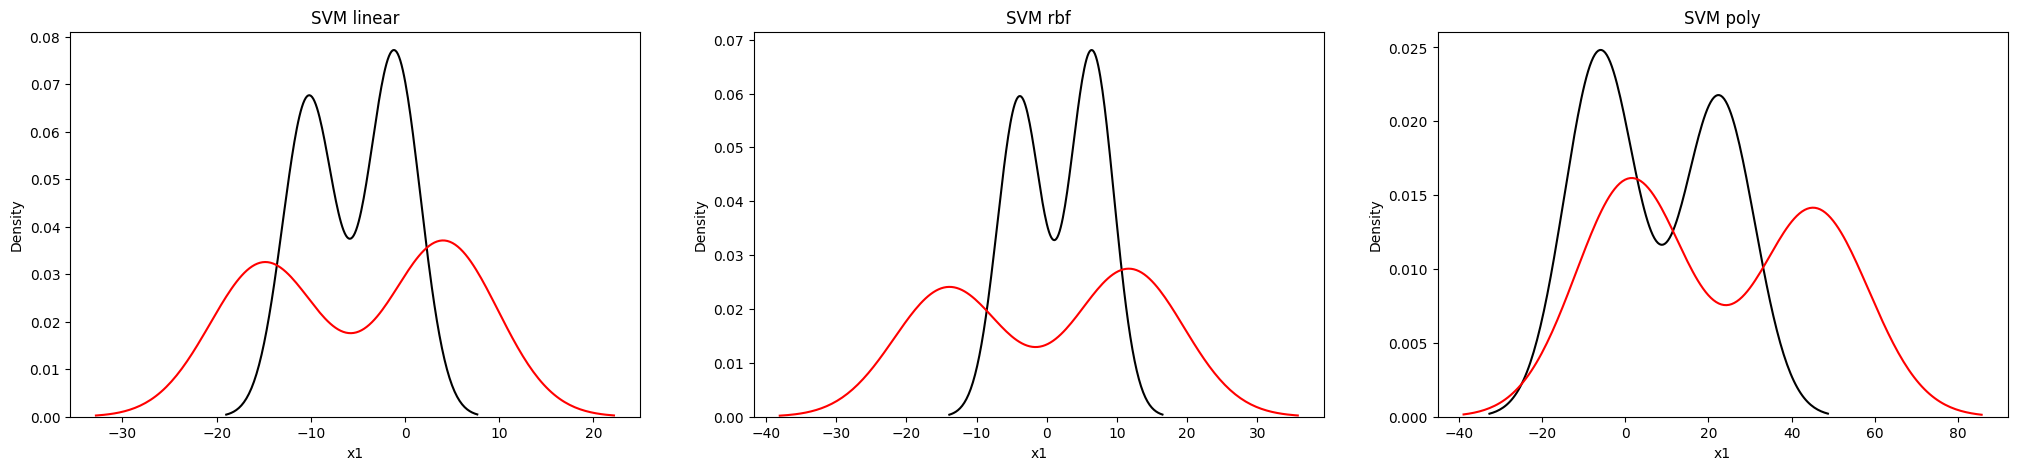

C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


 _   _  __  __     _     ____      _  __ _   _  _   _ 
| | | ||  \/  |   / \   |  _ \    | |/ /| \ | || \ | |
| | | || |\/| |  / _ \  | |_) |   | ' / |  \| ||  \| |
| |_| || |  | | / ___ \ |  __/    | . \ | |\  || |\  |
 \___/ |_|  |_|/_/   \_\|_|       |_|\_\|_| \_||_| \_|
                                                      



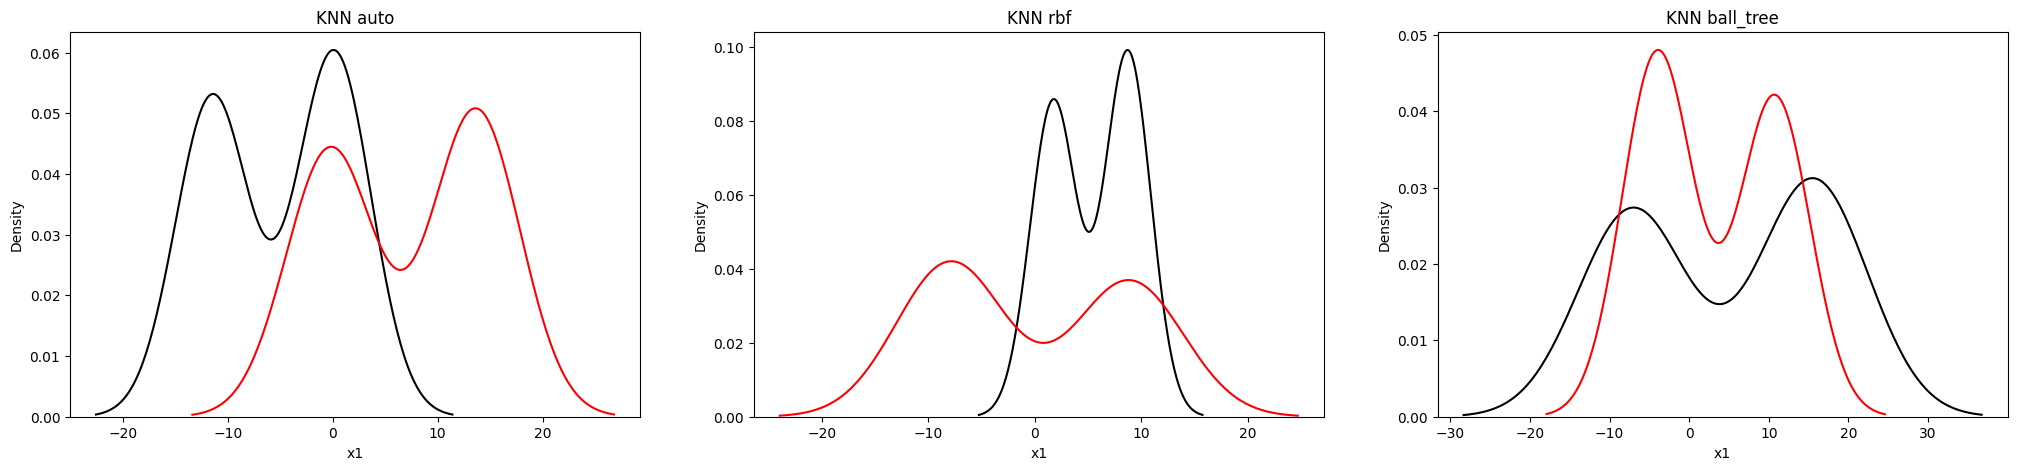

C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


 _   _  __  __     _     ____      ____                     _                    _____                          _   
| | | ||  \/  |   / \   |  _ \    |  _ \   __ _  _ __    __| |  ___   _ __ ___  |  ___|  ___   _ __   ___  ___ | |_ 
| | | || |\/| |  / _ \  | |_) |   | |_) | / _` || '_ \  / _` | / _ \ | '_ ` _ \ | |_    / _ \ | '__| / _ \/ __|| __|
| |_| || |  | | / ___ \ |  __/    |  _ < | (_| || | | || (_| || (_) || | | | | ||  _|  | (_) || |   |  __/\__ \| |_ 
 \___/ |_|  |_|/_/   \_\|_|       |_| \_\ \__,_||_| |_| \__,_| \___/ |_| |_| |_||_|     \___/ |_|    \___||___/ \__|
                                                                                                                    



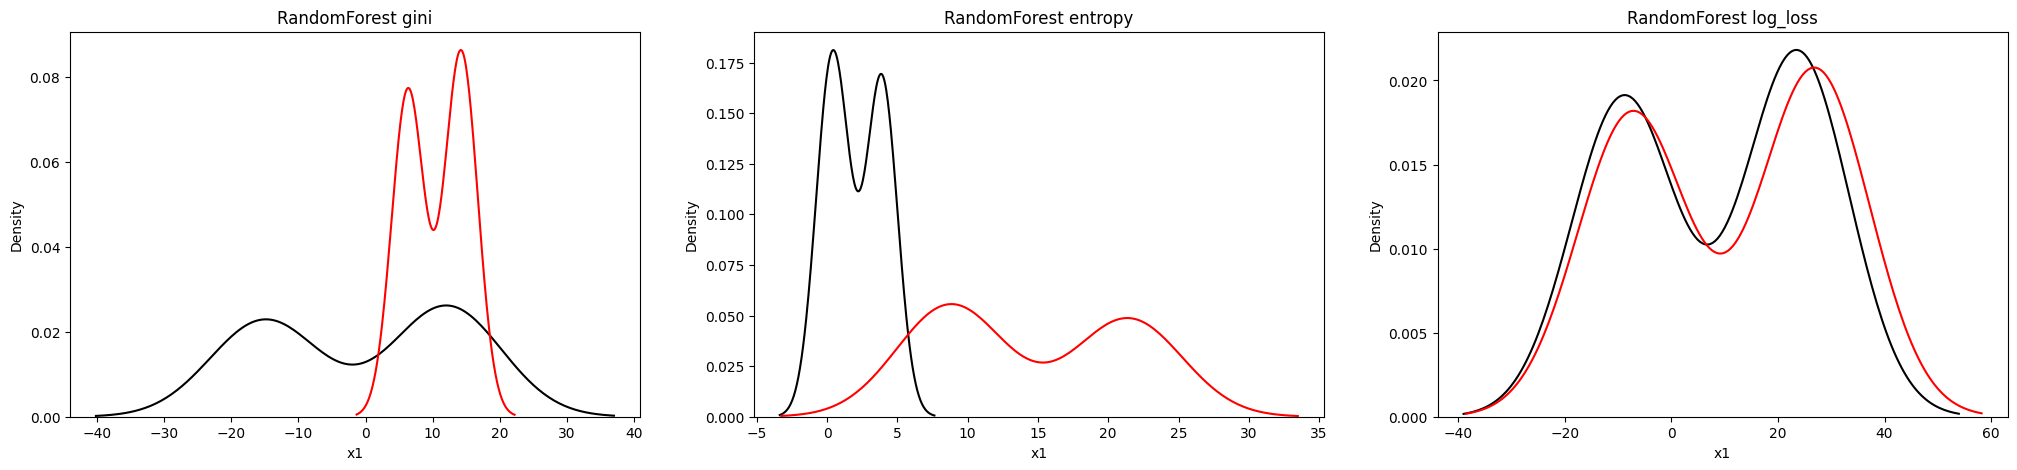

In [20]:


x_df1=pd.DataFrame(umap_function(y_pred_SVM), columns=['x1','x2']) # y_pred_SVM_2
x_df2=pd.DataFrame(umap_function(y_pred_SVM_2), columns=['x1','x2']) 
x_df3=pd.DataFrame(umap_function(y_pred_SVM_3), columns=['x1','x2']) 
tprint("UMAP   SVM")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('SVM linear')
ax2.set_title('SVM rbf')
ax3.set_title('SVM poly')

sns.kdeplot(x_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(x_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(x_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(x_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(x_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(x_df3['x2'], ax = ax3, color ='red')

plt.show()


y_df1=pd.DataFrame(umap_function(y_pred_KNN), columns=['x1','x2']) # y_pred_SVM_2
y_df2=pd.DataFrame(umap_function(y_pred_KNN_2), columns=['x1','x2']) 
y_df3=pd.DataFrame(umap_function(y_pred_KNN_3), columns=['x1','x2']) 
tprint("UMAP   KNN")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('KNN auto') #'auto', 'ball_tree', 'kd_tree',
ax2.set_title('KNN rbf')
ax3.set_title('KNN ball_tree')

sns.kdeplot(y_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(y_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(y_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(y_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(y_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(y_df3['x2'], ax = ax3, color ='red')

plt.show()



z_df1=pd.DataFrame(umap_function(y_pred_RF), columns=['x1','x2']) # y_pred_SVM_2
z_df2=pd.DataFrame(umap_function(y_pred_RF_3), columns=['x1','x2']) 
z_df3=pd.DataFrame(umap_function(y_pred_RF_3), columns=['x1','x2']) 
tprint("UMAP   RandomForest")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(25, 5)) #linear rbf poly
ax1.set_title('RandomForest gini') # 'gini', 'entropy', 'log_loss'
ax2.set_title('RandomForest entropy')
ax3.set_title('RandomForest log_loss')

sns.kdeplot(z_df1['x1'], ax = ax1, color ='black')
sns.kdeplot(z_df1['x2'], ax = ax1, color ='red')

sns.kdeplot(z_df2['x1'], ax = ax2, color ='black')
sns.kdeplot(z_df2['x2'], ax = ax2, color ='red')

sns.kdeplot(z_df3['x1'], ax = ax3, color ='black')
sns.kdeplot(z_df3['x2'], ax = ax3, color ='red')

plt.show()



SMOTE (Synthetic Minority Over-sampling Technique) в Python — это алгоритм ресемплинга, который используется для борьбы с проблемой дисбаланса классов в задачах машинного обучения. Давайте рассмотрим, как работает SMOTE:

Выбор миноритарного класса:

Алгоритм начинает с выбора миноритарного класса, который представлен меньшим количеством примеров.
Выбор ближайших соседей:

Для каждого примера из миноритарного класса выбираются его k ближайших соседей в пространстве признаков. Количество соседей (k) определяется пользователем.
Генерация синтетических примеров:

Для каждого примера миноритарного класса генерируются синтетические примеры, добавляя к нему взвешенную разницу между ним и одним из его ближайших соседей. Это делается для каждого соседа.
Добавление синтетических примеров:

Синтетические примеры добавляются к исходному набору данных миноритарного класса.

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, BorderlineSMOTE
from sklearn.manifold import TSNE
from umap import UMAP

SMOTE (Synthetic Minority Over-sampling Technique), BorderlineSMOTE и Borderline-SMOTE2 являются различными вариантами алгоритмов ресемплинга, используемых для устранения проблемы дисбаланса классов в задачах машинного обучения. Давайте рассмотрим основные отличия между этими методами:

SMOTE (Synthetic Minority Over-sampling Technique):

SMOTE является базовым алгоритмом ресемплинга.
Он генерирует синтетические примеры миноритарного класса, добавляя к каждому примеру взвешенную разницу между ним и одним из его ближайших соседей.
BorderlineSMOTE:

BorderlineSMOTE представляет собой расширение SMOTE, которое уделяет внимание примерам, находящимся на "границе" между классами (borderline examples).
Примеры, которые находятся на границе, определяются как те, для которых большинство их ближайших соседей относится к другому классу.
BorderlineSMOTE генерирует синтетические примеры только для таких "граничных" примеров, что может сделать создание синтетических примеров более информативным.
Borderline-SMOTE2:

Borderline-SMOTE2 является еще одним улучшением SMOTE, которое также фокусируется на примерах, находящихся на границе между классами.
Отличие от BorderlineSMOTE заключается в выборе соседей: Borderline-SMOTE2 рассматривает только тех ближайших соседей, которые сами являются "граничными" примерами.
Это позволяет более эффективно фокусироваться на примерах, которые близки к решающей границе классов.
Выбор между этими вариантами зависит от конкретной задачи и характеристик данных. В некоторых случаях BorderlineSMOTE или Borderline-SMOTE2 могут быть более предпочтительными, чем обычный SMOTE, особенно если важно улучшить генерацию синтетических примеров на границе классов.

In [26]:
x_train , x_test , y_train, y_test = train_test_split(predictors['date'], target, random_state=100, test_size = 0.5) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=100)
x_test=x_test.values.reshape(-1, 1)


predictors, target =bob[color[1:]], bob['class'] #  делим на то что есть и на то что предсказать 
x_train , x_test , y_train, y_test = train_test_split(predictors, target, random_state=0) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=100)
np.array(predictors.astype(int))

array([[1, 1, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0],
       [3, 0, 2, ..., 0, 0, 0],
       ...,
       [3, 0, 2, ..., 0, 0, 0],
       [5, 0, 2, ..., 0, 0, 0],
       [4, 0, 2, ..., 0, 0, 0]])

In [32]:
np.random.seed(42)
X =  np.array(predictors.astype(int))#np.random.rand(100, 10)
y = np.array(target)#np.random.choice([0, 1], size=100, p=[0.9, 0.1])
y

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int64)

In [30]:
np.random.seed(42)
X = np.random.rand(100, 10)
y = np.random.choice([0, 1], size=100, p=[0.9, 0.1])
X


array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
        0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
        0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
        0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446],
       [0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
        0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033],
       [0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
        0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694],
       [0.77224477, 0.19871568, 0.0055221

Before balancing:
SVM Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
k-NN Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
RandomForest Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
After balancing (SMOTE):
SVM Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
k-NN Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
RandomForest Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
After balancing (BorderlineSMOTE):
SVM Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
k-NN Accuracy: 0.5797, Precision: 1.0000, Recall: 0.1594, F1: 0.2750
RandomForest Accuracy: 0.6304, Precision: 1.0000, Recall: 0.2609, F1: 0.4138
After balancing (BorderlineSMOTE2):
SVM Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000
k-NN Accuracy: 0.5797, Precision: 1.0000, Recall: 0.1594, F1: 0.2750
RandomForest Accuracy: 0.6304, Precision: 1.0000, Recall: 0.2609, F1: 0.4138


C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision 

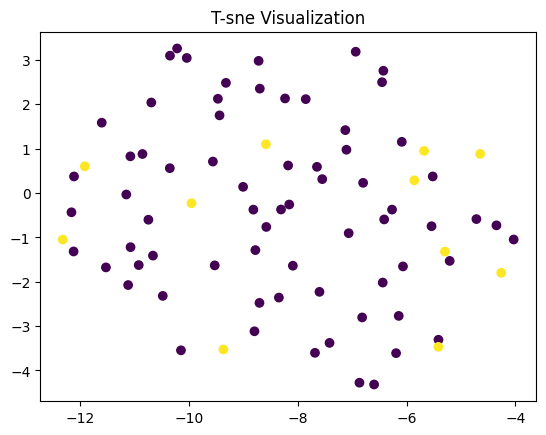

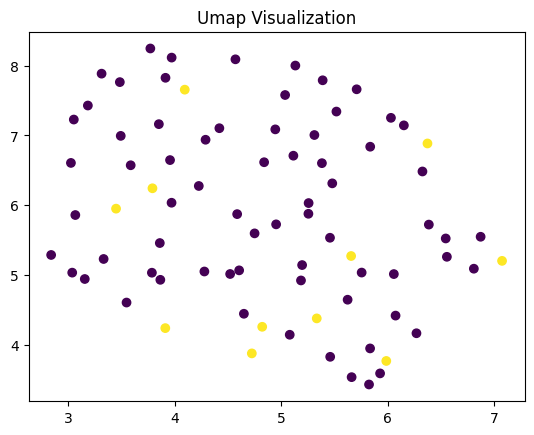

C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Дмитрий\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


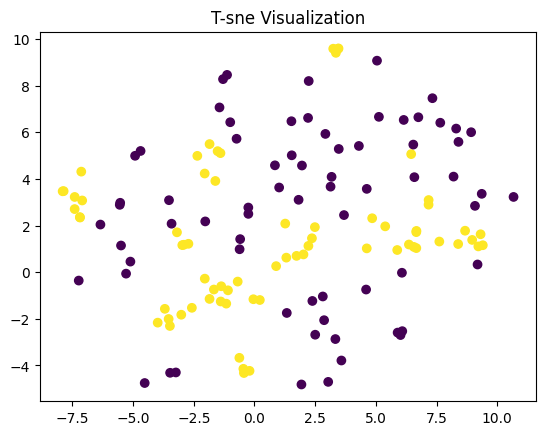

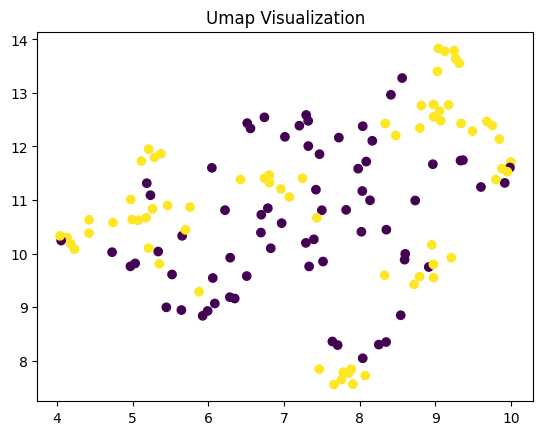

In [28]:


# Замените этот блок кода на загрузку своего набора данных
# Пример загрузки: df = pd.read_csv('ваш_файл.csv')
# X, y = df.drop('целевая_переменная', axis=1), df['целевая_переменная']

# Пример создания случайного набора данных для демонстрации
np.random.seed(42)
X = np.random.rand(100, 10)
y = np.random.choice([0, 1], size=100, p=[0.9, 0.1])

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Применение BorderlineSMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_resampled_borderline_smote, y_resampled_borderline_smote = borderline_smote.fit_resample(X_train, y_train)

# Применение BorderlineSMOTE2
borderline_smote2 = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_resampled_borderline_smote2, y_resampled_borderline_smote2 = borderline_smote2.fit_resample(X_train, y_train)

# Обучение SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Обучение k-NN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

# Обучение RandomForest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Сравнение производительности классификаторов до и после балансировки
def evaluate_classifier(y_true, y_pred, prefix=''):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'{prefix} Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')

print('Before balancing:')
evaluate_classifier(y_test, y_pred_svm, 'SVM')
evaluate_classifier(y_test, y_pred_knn, 'k-NN')
evaluate_classifier(y_test, y_pred_rf, 'RandomForest')

print('After balancing (SMOTE):')
y_pred_svm_smote = svm_classifier.predict(X_test)
evaluate_classifier(y_test, y_pred_svm_smote, 'SVM')
y_pred_knn_smote = knn_classifier.predict(X_test)
evaluate_classifier(y_test, y_pred_knn_smote, 'k-NN')
y_pred_rf_smote = rf_classifier.predict(X_test)
evaluate_classifier(y_test, y_pred_rf_smote, 'RandomForest')

print('After balancing (BorderlineSMOTE):')
y_pred_svm_borderline_smote = svm_classifier.predict(X_resampled_borderline_smote)
evaluate_classifier(y_resampled_borderline_smote, y_pred_svm_borderline_smote, 'SVM')
y_pred_knn_borderline_smote = knn_classifier.predict(X_resampled_borderline_smote)
evaluate_classifier(y_resampled_borderline_smote, y_pred_knn_borderline_smote, 'k-NN')
y_pred_rf_borderline_smote = rf_classifier.predict(X_resampled_borderline_smote)
evaluate_classifier(y_resampled_borderline_smote, y_pred_rf_borderline_smote, 'RandomForest')

print('After balancing (BorderlineSMOTE2):')
y_pred_svm_borderline_smote2 = svm_classifier.predict(X_resampled_borderline_smote2)
evaluate_classifier(y_resampled_borderline_smote2, y_pred_svm_borderline_smote2, 'SVM')
y_pred_knn_borderline_smote2 = knn_classifier.predict(X_resampled_borderline_smote2)
evaluate_classifier(y_resampled_borderline_smote2, y_pred_knn_borderline_smote2, 'k-NN')
y_pred_rf_borderline_smote2 = rf_classifier.predict(X_resampled_borderline_smote2)
evaluate_classifier(y_resampled_borderline_smote2, y_pred_rf_borderline_smote2, 'RandomForest')

# Визуализация с t-SNE и UMAP
def visualize_data(X, y, method='t-sne', **kwargs):
    if method == 't-sne':
        embedding = TSNE(**kwargs).fit_transform(X)
    elif method == 'umap':
        embedding = UMAP(**kwargs).fit_transform(X)
    else:
        raise ValueError(f'Unsupported visualization method: {method}')

    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis')
    plt.title(f'{method.capitalize()} Visualization')
    plt.show()

# Визуализация исходных данных
visualize_data(X_train, y_train)
visualize_data(X_train, y_train, 'umap')

# Визуализация данных после балансировки (SMOTE)
visualize_data(X_resampled_smote, y_resampled_smote)
visualize_data(X_resampled_smote, y_resampled_smote, 'umap')

# Визуализация
